<a href="https://colab.research.google.com/github/Akshay-Rajesh/DSA_Assignments_AkshaY/blob/main/Case_study_on_Pre_processing_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### **1)-Load the dataset into python environment**

In [2]:
data = pd.read_csv("titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **2)-Make ‘PassengerId’ as the index column**

In [4]:
data1 = data.set_index("PassengerId")

In [5]:
data1.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### **3)-Check the basic details of the dataset**

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data1.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Maisner, Mr. Simon",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*we can see there are 11 columns and 891 rows of data.

*Age,. Embarked and Cabin is having missing values

*We have object , float and int datatypes

*We have the Sex column which is categorical we need to convert it .

### **4)-Fill in all the missing values present in all the columns in the dataset**

In [10]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# we are using mean to fill missing Age
data1["Age"].fillna(data1["Age"].mean() , inplace = True)

In [12]:
data1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#For EMbarked we can fill missing values with mode as we can see S is having more count , so our missing data might also be S

data1["Embarked"].fillna(data1["Embarked"].mode() , inplace = True)

In [14]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

the Cabin column has 687 missing values out total data is 891 , so its logical to drop that column rather than fill the missing values , also cabin will not affect our prediction if we are predicting survival.

In [15]:
data1.drop("Cabin" , axis =1 , inplace =True)

In [16]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
# We can do convert categorical column Sex as male =0 , femae =1

data1["Sex"].replace("male" ,0 , inplace = True)
data1["Sex"].replace("female" ,1 ,inplace = True)


In [18]:
data1.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C


### **5)-Check and handle outliers in at least 3 columns in the dataset**

{'boxes': [<matplotlib.lines.Line2D at 0x7f5cf39d9290>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5cf3966350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cf396e390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cf3966e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5cf39d9890>,
  <matplotlib.lines.Line2D at 0x7f5cf39d9dd0>]}

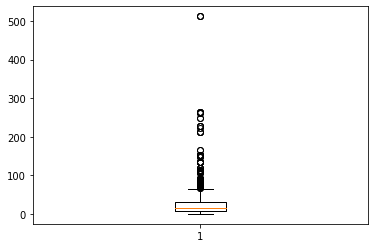

In [19]:
# we can draw a boxplot to find outliers 
plt.boxplot(data1["Fare"])

In [20]:

#We see some outliers so we have to fix it 

Q1 = np.percentile(data1["Fare"] ,25 , interpolation = "midpoint")
Q2 = np.percentile(data1["Fare"] , 50 , interpolation ="midpoint")
Q3 = np.percentile(data1["Fare"] ,75 , interpolation ="midpoint")

#find IQR

IQR = Q3-Q1
print("IQR is " , IQR)

#find upper and lower limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3+1.5*IQR

outlier = []

for x in data1["Fare"]:
  if ((x > upper_limit) or (x < lower_limit)):
    outlier.append(x)
print("outlier are " , outlier)


IQR is  23.0896
outlier are  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [21]:
# We can see all out outliers are above the upper limit 

index_outlier = data1["Fare"] > upper_limit
ind_out = data1.loc[index_outlier].index
# we drop the outliers from our data
data1.drop(ind_out , inplace = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5cf34bb7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5cf34bf810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cf34c7850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cf34c7310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5cf34bbd50>,
  <matplotlib.lines.Line2D at 0x7f5cf34bf2d0>]}

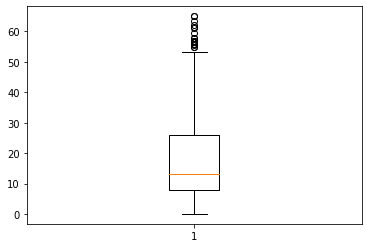

In [22]:
plt.boxplot(data1["Fare"])

In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Name      775 non-null    object 
 3   Sex       775 non-null    int64  
 4   Age       775 non-null    float64
 5   SibSp     775 non-null    int64  
 6   Parch     775 non-null    int64  
 7   Ticket    775 non-null    object 
 8   Fare      775 non-null    float64
 9   Embarked  775 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 66.6+ KB


{'boxes': [<matplotlib.lines.Line2D at 0x7f5cf3432390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5cf3438410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cf3441490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cf3438ed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5cf3432950>,
  <matplotlib.lines.Line2D at 0x7f5cf3432e90>]}

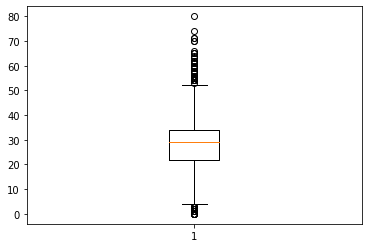

In [24]:
# We will try to check for outliers in Age column


plt.boxplot(data1["Age"].astype(int))

In [25]:
#We see some outliers so we have to fix it 

Q1 = np.percentile(data1["Age"] ,25 , interpolation = "midpoint")
Q2 = np.percentile(data1["Age"] , 50 , interpolation ="midpoint")
Q3 = np.percentile(data1["Age"] ,75 , interpolation ="midpoint")

#find IQR

IQR = Q3-Q1
print("IQR is " , IQR)

#find upper and lower limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3+1.5*IQR

outlier = []

for x in data1["Age"]:
  if ((x > upper_limit) or (x < lower_limit)):
    outlier.append(x)
print("outlier are " , outlier)

IQR is  12.0
outlier are  [54.0, 2.0, 58.0, 55.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 2.0, 59.0, 54.0, 62.0, 3.0, 65.0, 54.0, 61.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 54.0, 2.0, 64.0, 62.0, 62.0, 53.0, 54.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 70.0, 60.0, 60.0, 0.67, 57.0, 54.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0]


In [26]:
# we are finiding the index of outliers less than lower limit and dropping those
index_outlier = data1["Age"] < lower_limit
data1.drop(data1.loc[index_outlier].index , inplace = True)

In [27]:
# we are finding the index of outliers greater than upper limit and dropping those
index_outlier2 = data1["Age"] > upper_limit
data1.drop(data1.loc[index_outlier2].index , inplace = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5cf33b28d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5cf33b48d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cf33bb910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cf33bb3d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5cf33b2e10>,
  <matplotlib.lines.Line2D at 0x7f5cf33b4390>]}

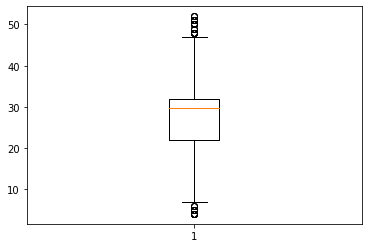

In [28]:
plt.boxplot(data1["Age"])

In [29]:
data1["Parch"].value_counts()

0    573
1     77
2     45
5      5
3      4
4      3
6      1
Name: Parch, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f5cf3392e50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5cf331ce90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cf3321ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cf3321990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5cf331c410>,
  <matplotlib.lines.Line2D at 0x7f5cf331c950>]}

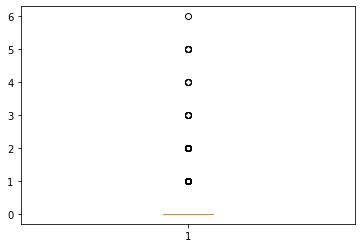

In [30]:
plt.boxplot(data["Parch"])

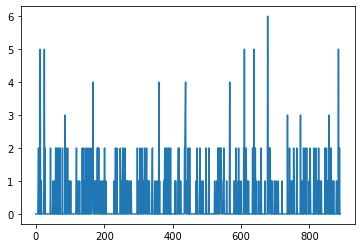

In [31]:
plt.plot(data["Parch"])

In [32]:
#looks like there are no extremen values so we can ignore outliers


### **6)-Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [33]:
from sklearn import preprocessing

In [79]:
# we just take a copy of our data so that we can go back to old data if required
data2 = data1.copy(deep =True)

In [45]:
data2.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.250,S
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.925,S


In [80]:
# we drop string values name and Ticket
data2.drop(["Name" , "Ticket"] , axis =1 , inplace = True)

In [62]:
data2.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.250,S
3,1,3,1,26.0,0,0,7.925,S


In [81]:
#We do one hot encoding on EMbarked
dummies = pd.get_dummies(data2["Embarked"] , prefix ="Embarked")
data2 = data2.drop("Embarked" , axis =1 )
data2 = pd.concat([data2 , dummies] , axis =1 )

In [66]:
data2.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.250,0,0,1
3,1,3,1,26.0,0,0,7.925,0,0,1


In [82]:
#now we can do min max scaling 
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()

X = data2.drop("Survived" , axis =1)

In [83]:
y = data2["Survived"]

In [84]:
X = min_max.fit_transform(X)
X = pd.DataFrame(X)

In [85]:
y = min_max.fit_transform([y])
y = pd.DataFrame(y)

In [98]:
y = y.stack()

In [99]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y ,test_size=1/3 , random_state = 44)

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
my_model = model.fit(xtrain,ytrain)
prediction = my_model.predict(xtest)

In [102]:
from sklearn.metrics import mean_squared_error

print("MSe is " ,mean_squared_error(ytest, prediction))

MSe is  0.0
